
## Programming for Data Science

### Lecture 15: Neural Networks, TensorFlow AutoDiff, and Keras

### Instructor: Farhad Pourkamali 


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/ProgrammingForDataScience/blob/main/Lecture15_NeuralNets.ipynb)


### Introduction
<hr style="border:2px solid gray">

* Neural networks are computational models inspired by the human brain's structure and function, designed to recognize patterns and solve complex problems in various domains.

* Unlike simpler linear models, which directly map input features to outputs, neural networks introduce one or more hidden layers between inputs and outputs, providing much greater expressive power.


* Let us create a 1D synthetic dataset with a polynomial degree of 2 using a simple quadratic equation of the form $y=ax^2 + bx +c$,
where $a, b,  c$ are constants, and $x$ and $y$
are the input and output variables, respectively. We can then add some noise to 
$y$ to make the dataset more realistic.

* After generating the dataset, we will create a neural network using Keras, a high-level neural networks API running on top of TensorFlow. The network will have one input layer, one hidden layer, and one output layer. The hidden layer will help the network learn the underlying quadratic relationship in the data.

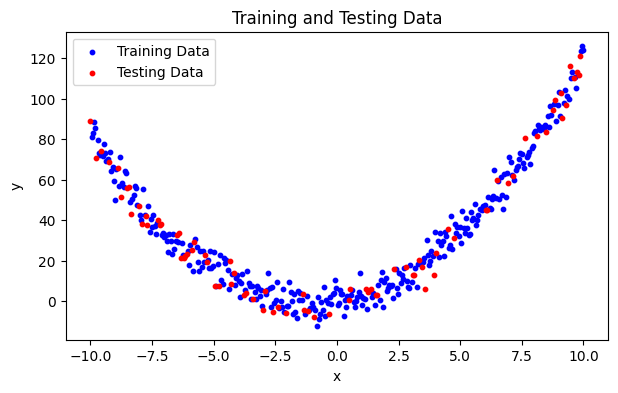

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Parameters for the quadratic equation y = ax^2 + bx + c
a = 1
b = 2
c = 0

# Generate synthetic data
np.random.seed(0)  # For reproducibility
x = np.linspace(-10, 10, 400)
y = a * x**2 + b * x + c + np.random.normal(0, 5, size=x.shape)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape the data for compatibility with Keras (if needed)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Plotting the training and testing data
plt.figure(figsize=(7, 4))

# Training data in blue
plt.scatter(x_train, y_train, color='blue', s=10, label='Training Data')

# Testing data in red
plt.scatter(x_test, y_test, color='red', s=10, label='Testing Data')

plt.title('Training and Testing Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

* Next, we will create a neural network using Keras. The network will have one input layer, one hidden layer with a non-linear activation function, and one output layer. We'll compile the model using an appropriate optimizer (like Adam) and a loss function suitable for regression tasks (mean squared error, for example). Then, we'll fit the model to our synthetic dataset.

<img src="https://raw.githubusercontent.com/farhad-pourkamali/ProgrammingForDataScience/main/images/nnpoly.png" width=500>

* Initialize the Model: Create a `Sequential` model. This type of model is a linear stack of layers.

In [2]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


* Add Layers:

    * Input and Hidden Layer: Add a densely-connected (fully connected) layer with an activation function. The `input_dim` parameter should be set to 1 since we have a 1D input (just x), and you can choose an arbitrary number of neurons (e.g., 5).
    * Output Layer: Add another dense layer with 1 neuron since we want a single continuous output value (y).

In [3]:
model.add(Dense(5, input_dim=1, activation='elu'))

model.add(Dense(1))


* A model summary in the context of neural networks, especially when using libraries like Keras, provides a quick and useful visualization of your model's architecture. It includes details about the layers in your model, their shapes, the number of parameters in each layer, and the total number of parameters in the model.

    * Total params: This is the sum of all parameters in the model, giving an idea of the complexity and the capacity of the model to learn.

    * Trainable params: This number indicates how many of the total parameters are trainable. In most cases, this will be the same as the total number of parameters unless you are using pre-trained layers that are frozen.

    * Non-trainable params: These are the parameters that will not be updated during training. This usually pertains to pre-trained layers where the weights are frozen and used as-is.

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<img src="https://raw.githubusercontent.com/farhad-pourkamali/ProgrammingForDataScience/main/images/nnpoly.png" width=500>

* Compile the Model: Use the `Adam` optimizer and `mean squared error` (mse) as the loss function, which is common for regression problems.

In [5]:
model.compile(optimizer="adam", loss='mean_squared_error')


* Fit the Model: Train the model on your data (`x_train` and `y_train`) for a chosen number of epochs. You might start with 500 epochs and adjust based on the performance.

In [6]:
history = model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
10/10 [==============================] - 0s 4ms/step - loss: 2054.3044
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 2041.9576
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 2029.4196
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 2017.1885
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 2004.2408
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 1992.5156
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 1979.4330
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 1967.6344
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 1955.3793
Epoch 10/500
10/10 [==============================] - 0s 3ms/step - loss: 1943.2255
Epoch 11/500
10/10 [==============================] - 0s 3ms/step - loss: 1930.7324
Epoch 12/500
10/10 [==============================] - 0s 3ms/step - loss: 1918.8395
E

Epoch 99/500
10/10 [==============================] - 0s 4ms/step - loss: 548.2009
Epoch 100/500
10/10 [==============================] - 0s 4ms/step - loss: 536.9420
Epoch 101/500
10/10 [==============================] - 0s 4ms/step - loss: 525.4648
Epoch 102/500
10/10 [==============================] - 0s 4ms/step - loss: 514.6409
Epoch 103/500
10/10 [==============================] - 0s 4ms/step - loss: 503.4774
Epoch 104/500
10/10 [==============================] - 0s 4ms/step - loss: 492.9737
Epoch 105/500
10/10 [==============================] - 0s 4ms/step - loss: 482.8391
Epoch 106/500
10/10 [==============================] - 0s 3ms/step - loss: 472.2251
Epoch 107/500
10/10 [==============================] - 0s 4ms/step - loss: 462.7788
Epoch 108/500
10/10 [==============================] - 0s 4ms/step - loss: 452.8219
Epoch 109/500
10/10 [==============================] - 0s 4ms/step - loss: 443.5049
Epoch 110/500
10/10 [==============================] - 0s 4ms/step - loss: 43

10/10 [==============================] - 0s 4ms/step - loss: 160.7427
Epoch 197/500
10/10 [==============================] - 0s 4ms/step - loss: 160.2374
Epoch 198/500
10/10 [==============================] - 0s 4ms/step - loss: 159.7385
Epoch 199/500
10/10 [==============================] - 0s 4ms/step - loss: 159.3360
Epoch 200/500
10/10 [==============================] - 0s 4ms/step - loss: 158.8491
Epoch 201/500
10/10 [==============================] - 0s 4ms/step - loss: 158.3503
Epoch 202/500
10/10 [==============================] - 0s 4ms/step - loss: 157.9261
Epoch 203/500
10/10 [==============================] - 0s 4ms/step - loss: 157.5127
Epoch 204/500
10/10 [==============================] - 0s 3ms/step - loss: 157.0849
Epoch 205/500
10/10 [==============================] - 0s 4ms/step - loss: 156.6370
Epoch 206/500
10/10 [==============================] - 0s 3ms/step - loss: 156.2260
Epoch 207/500
10/10 [==============================] - 0s 4ms/step - loss: 155.8103
Epoch 

10/10 [==============================] - 0s 4ms/step - loss: 128.7742
Epoch 294/500
10/10 [==============================] - 0s 4ms/step - loss: 128.4947
Epoch 295/500
10/10 [==============================] - 0s 4ms/step - loss: 128.2342
Epoch 296/500
10/10 [==============================] - 0s 4ms/step - loss: 127.9463
Epoch 297/500
10/10 [==============================] - 0s 4ms/step - loss: 127.6695
Epoch 298/500
10/10 [==============================] - 0s 4ms/step - loss: 127.4059
Epoch 299/500
10/10 [==============================] - 0s 4ms/step - loss: 127.2040
Epoch 300/500
10/10 [==============================] - 0s 4ms/step - loss: 126.8921
Epoch 301/500
10/10 [==============================] - 0s 4ms/step - loss: 126.6274
Epoch 302/500
10/10 [==============================] - 0s 3ms/step - loss: 126.3851
Epoch 303/500
10/10 [==============================] - 0s 4ms/step - loss: 126.0962
Epoch 304/500
10/10 [==============================] - 0s 4ms/step - loss: 125.8460
Epoch 

10/10 [==============================] - 0s 4ms/step - loss: 106.0814
Epoch 391/500
10/10 [==============================] - 0s 4ms/step - loss: 105.8714
Epoch 392/500
10/10 [==============================] - 0s 4ms/step - loss: 105.6868
Epoch 393/500
10/10 [==============================] - 0s 4ms/step - loss: 105.4692
Epoch 394/500
10/10 [==============================] - 0s 4ms/step - loss: 105.2718
Epoch 395/500
10/10 [==============================] - 0s 4ms/step - loss: 105.0798
Epoch 396/500
10/10 [==============================] - 0s 4ms/step - loss: 104.8656
Epoch 397/500
10/10 [==============================] - 0s 4ms/step - loss: 104.6672
Epoch 398/500
10/10 [==============================] - 0s 4ms/step - loss: 104.4873
Epoch 399/500
10/10 [==============================] - 0s 4ms/step - loss: 104.2890
Epoch 400/500
10/10 [==============================] - 0s 3ms/step - loss: 104.0860
Epoch 401/500
10/10 [==============================] - 0s 4ms/step - loss: 103.9090
Epoch 

10/10 [==============================] - 0s 4ms/step - loss: 88.9850
Epoch 489/500
10/10 [==============================] - 0s 4ms/step - loss: 88.9089
Epoch 490/500
10/10 [==============================] - 0s 4ms/step - loss: 88.7164
Epoch 491/500
10/10 [==============================] - 0s 4ms/step - loss: 88.5311
Epoch 492/500
10/10 [==============================] - 0s 4ms/step - loss: 88.4051
Epoch 493/500
10/10 [==============================] - 0s 4ms/step - loss: 88.2573
Epoch 494/500
10/10 [==============================] - 0s 4ms/step - loss: 88.1245
Epoch 495/500
10/10 [==============================] - 0s 3ms/step - loss: 87.9958
Epoch 496/500
10/10 [==============================] - 0s 4ms/step - loss: 87.8470
Epoch 497/500
10/10 [==============================] - 0s 4ms/step - loss: 87.7985
Epoch 498/500
10/10 [==============================] - 0s 4ms/step - loss: 87.5845
Epoch 499/500
10/10 [==============================] - 0s 4ms/step - loss: 87.4115
Epoch 500/500
10/1

3/3 [==============================] - 0s 5ms/step


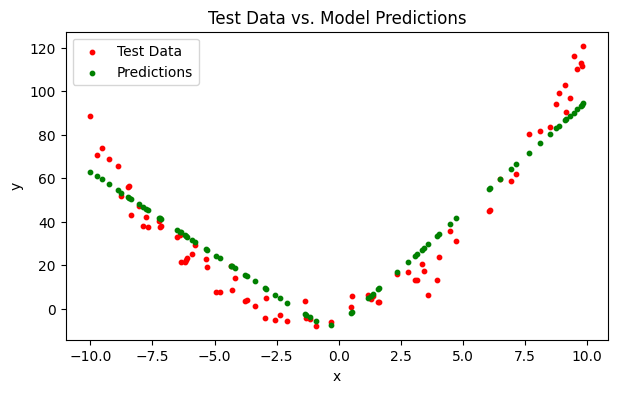

In [7]:
# Make predictions
y_pred = model.predict(x_test)

# Plotting the test data and predictions
plt.figure(figsize=(7, 4))

# Test data in red
plt.scatter(x_test, y_test, color='red', s=10, label='Test Data')

# Predicted data in green
plt.scatter(x_test, y_pred, color='green', s=10, label='Predictions')

plt.title('Test Data vs. Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### How do we train neural networks? 
<hr style="border:2px solid gray">

* When you're training a neural network, you need to compute gradients of the loss with respect to the model parameters to update them using optimization algorithms like stochastic gradient descent.

* Automatic differentiation (autodiff) is a key concept in deep learning that allows for the efficient computation of gradients, which are essential for training neural networks. 

* `GradientTape` is like a recording mechanism that watches the operations executed inside its context. 

    * During the forward pass, it records the operations for later gradient computation. Once the forward pass is done, you can use the recorded information to compute gradients effortlessly.

<img src="https://raw.githubusercontent.com/farhad-pourkamali/ProgrammingForDataScience/main/images/chainrule.png
" width=600>



In [8]:
import tensorflow as tf

# Define the function f(u, v)
def f(u, v):
    return 3 * u + 5 * v

# Define values for x and y
x = tf.constant(2.0)
y = tf.constant(3.0)

# Use tf.GradientTape to compute gradients
with tf.GradientTape(persistent=True) as tape:
    # Watch the variables we want to compute gradients with respect to
    tape.watch(x)
    tape.watch(y)
    
    # Define u and v as functions of x and y
    u = 2 * x
    v = x + y

    # Define f as a function of u and v
    result = f(u, v)

# Compute the gradients
df_dx = tape.gradient(result, x)
df_dy = tape.gradient(result, y)


# Print the gradients
print("df/dx:", df_dx.numpy())
print("df/dy:", df_dy.numpy())

df/dx: 11.0
df/dy: 5.0


This example demonstrates a simple linear regression model trained using TensorFlow, illustrating the use of `tf.GradientTape` for automatic differentiation and gradient descent for parameter updates.

In [9]:
import tensorflow as tf

# Generate some synthetic data for demonstration
x_train = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
y_true = tf.constant([2.0, 4.0, 6.0, 8.0], dtype=tf.float32)

# Initialize the weight (slope)
w = tf.Variable(0, dtype=tf.float32)

# Define the linear regression model without bias
def linear_regression(w, x):
    return w * x

# Define the mean squared error loss
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))



#### Training Loop

* The training process is iterated over a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, and updates the model's weight.

* `tf.GradientTape()` is used to record the operations for automatic differentiation. It keeps track of the forward pass and the computation of the loss function.

* The gradient of the loss with respect to the model's weight is calculated using `tape.gradient(loss, w)`. This gradient indicates the direction and magnitude to adjust w to minimize the loss.

* The weight is updated by subtracting the product of the learning rate and the gradient from the current weight value (`w.assign_sub(learning_rate * gradient)`). 

    * This is the gradient descent optimization step, which moves the weight in the direction that reduces the loss.

In [10]:
# Training loop using tf.GradientTape
learning_rate = 0.01
epochs = 50

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = linear_regression(w, x_train)
        
        # Calculate mean squared error
        loss = mean_squared_error(y_true, y_pred)
    
    # Compute gradient with respect to weight (w)
    gradient = tape.gradient(loss, w)
    
    # Update weight using gradient descent
    w.assign_sub(learning_rate * gradient)
    
    # Print the loss for every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss {loss.numpy()}, Weight {w.numpy()}")

# Final weight after training
print(f"Final weight: {w.numpy()}")


Epoch 0: Loss 30.0, Weight 0.29999998211860657
Epoch 10: Loss 1.1627857685089111, Weight 1.6653136014938354
Epoch 20: Loss 0.0450688973069191, Weight 1.934108853340149
Epoch 30: Loss 0.0017468547448515892, Weight 1.987027645111084
Epoch 40: Loss 6.770494655938819e-05, Weight 1.9974461793899536
Final weight: 1.999408483505249


### A tour of activation functions
<hr style="border:2px solid gray">

* ReLU (Rectified Linear Unit)
    * ReLU is known for its simplicity and has been widely used in deep learning due to its ability to introduce non-linearity into the network
    
    $$\text{ReLU}(x)=\max\{0, x\}$$
    
* ELU (Exponential Linear Unit)
    * ELU addresses the "dying ReLU" problem by allowing negative values, which helps to keep gradients flowing during training
    * $\alpha$ is a hyperparameter that controls the output of the function for negative values of $x$
    
    $$\text{ELU}(x)=\begin{cases}x & \text{if } x \geq 0 \\
\alpha \cdot \big(\exp(x) - 1\big) & \text{if } x < 0
\end{cases}$$

* Softplus
    * Softplus is a smooth approximation of the ReLU function
    * It has the advantage of being differentiable everywhere, which makes it suitable for gradient-based optimization algorithms
    
    $$\text{Softplus}(x)=\log\big(1+\exp(x)\big)$$


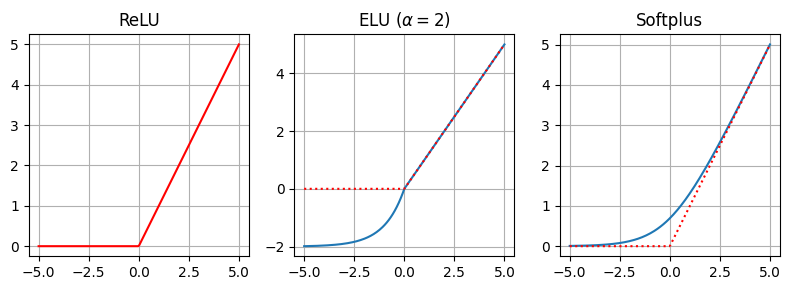

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of x values
x = np.linspace(-5, 5, 200)  # Adjust the range as needed

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the ELU function
def elu(x, alpha=2.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Define the Softplus function
def softplus(x):
    return np.log(1 + np.exp(x))


# Plot the activation functions
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.title("ReLU")
plt.plot(x, relu(x), 'r-')
plt.grid()

plt.subplot(1, 3, 2)
plt.title(r"ELU ($\alpha=2$)")
plt.plot(x, elu(x))
plt.plot(x, relu(x), 'r:')
plt.grid()

plt.subplot(1, 3, 3)
plt.title("Softplus")
plt.plot(x, softplus(x))
plt.plot(x, relu(x), 'r:')
plt.grid()

plt.tight_layout()
plt.show()

* In Keras, a `Dense` layer is a fully connected neural network layer where each input node is connected to each output node. The Dense layer is a core layer in Keras and is used frequently in creating neural network models. The basic syntax for adding a Dense layer is as follows:

```
from keras.layers import Dense

# Adding a Dense layer
dense_layer = Dense(units, activation=None, ...)

```

* units: This is a required parameter and represents the number of neurons (output size) in the layer.
* activation: The activation function to use. If you don't specify anything, no activation is applied (i.e., "linear" activation: a(x) = x). Common activation functions include 'relu', 'elu', and 'sigmoid'.

### HW 15

1. In this assignment, you will explore the California housing dataset from the `sklearn.datasets` module by training a neural network model. 
Load the California housing dataset from `sklearn.datasets` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing). Divide the dataset into a training set and a testing set, adhering to a common split ratio such as 70% for training and 30% for testing. Normalize feature data to have zero mean and unit variance.


Use the Keras Sequential API to define a neural network model. Add two hidden layers with "relu" activation and a suitable number of neurons (e.g., 64). Include an output layer with a single neuron for the regression output. The output layer should not have an activation function (or use "linear" which is equivalent to no activation). 

Compile the model with the `adam` optimizer and `mean_squared_error` as the loss function. 
Evaluate the model on the test data to obtain the mean squared error.

2. In this problem, we will use the "breast cancer wisconsin dataset" from scikit-learn for training and evaluating classification models (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The dataset comprises 30 features (mean radius, mean texture, mean perimeter, etc.) and a target variable or class.

Import this dataset from scikit-learn to form the input data matrix $\mathbf{X}$ and the target vector $\mathbf{y}$. Split the dataset by using the function train_test_split() with 70% training data.

The goal is to build a neural network classifier for this problem. List the combinations of hyperparameters you want to explore. In this case, it's the number of hidden layers and the number of units in each hidden layer. For example, you can use `layers_grid = [1, 2, 3]` and 
`units_grid = [16, 32, 64]`.

Define a function named `create_model(num_layers, num_units)` that creates a new Keras model for each combination of hyperparameters.  The last/output layer of the model is defined with a "sigmoid" activation function. This is crucial for binary classification models, as the "sigmoid" function ensures that the output of the model can be interpreted as a probability. 

For each combination, train the model on the training set and evaluate it on the testing set using the recall score. Two nested for loops should iterate over the number of hidden layers and units, respectively, to train and evaluate a model for each combination. Keep track of the performance of each combination to identify the best performing set of hyperparameters. This means you need to store the best result obtained up to any point in the search process, along with the corresponding hyperparameters that led to this result.
